<a href="https://colab.research.google.com/github/seyrankhademi/introduction2AI/blob/main/linear_vs_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Programming vs Machine Learning 
This notebook is written by Dr. Seyran Khademi to familiarize the students with the concept of machine learning and its difference with computer programming. The code is developed in Jupyter notebook and it is compatible with the Google Colab platform. 

---
## What is fundamentally different between machine learning and computer programming?

Let's look at an example project. Suppose that university wants to automate the process of granting scholarship to the students.  They need a computer to make a decision whether an applicant is eligible for the scholarship or not based on some handcrafted features extracted by people at university including 1) grade point average (GPA) 2) quality of portfolio(QP) 3) Age and 4) whether the applicant has other loans or not. So for each applicant, there is a given tabular data like the following: 

| Features | Applicant   
|------|------|
|   GPA  | a number between [0,10]|
|   QP  |a number between [0,10] |
|   Age  |an integer between [18,40]|
|   Loan  |1 or 0 for loan/no loan|

Weighted-sum program
In the first attempt, we use a piece of code that computes the weighted sum of the given features as the final score for the applicant. In computer programming, the program (the rules) are set by the human explicitly. In our scholarship project, the rules are the weights for each feature,i.e., $[w_1,w_2,w_3,w_4]$. Note that each weight is the importance of the corresponding feature in the final score. Suppose that the committee for the scholarship assignment proposes the following weights $[0.4.0.3,0.2,0.1]$  respectively. The following cell is the code snippet that computes the final score of the applicant by the given weights.



In [1]:
# The weighet-sum function takes as an input the feature values for the applicant
# and outputs the final score. 

import numpy as np

def weighted_sum(GPA,QP,Age,Loan):
  #check that the points for GPA and QP are in range between 0 and 10
  x=GPA
  y=QP
  points = np.array([x,y])
  if (points < 0).all() and (points > 10).all(): 
    print("Error: The GPA and PQ points must be between 0 and 10.")

  #check that the age in range between 18 and 40
  z=Age
  if (z < 18) or (z > 40): 
    print("Note: Applicants younger than 18 and older than 40 are not eligible for the scholorship.")

  #check that the loan feature is specified as binary 
  v=Loan
  if (z ==0 or z==1): 
    print("Error: If the applicant has other loans currently enter 1 otherwise enter 0 for the Loan feature.")   

  #compute the weighed sum score
  w1=0.4
  w2=0.3
  w3=0.2
  w4=0.1
  Score=w1*x+w2*y+w3*z+w4*v
  print("Final score for the applicant is", + Score)


Let's see what is the score for Sara given the folowing records: 

| Features | Sara  
|------|------|
|   GPA  | 7.8|
|   QP  |6.5 |
|   Age  |26|
|   Loan  |0|

We call the function ```weighted_sum``` to compute the score ...

In [4]:
weighted_sum(7.8,6.5,26,0)

Final score for the applicant is 10.27


By running the code cell you found out what is the final score for Sara. In case the scholarship is competitive you need to compute the scores for other applicants and see whether Sara is in, e.g., the top 50% or not but we stop here as we made already our point. The weights (the selection rule) are given to the computer for this task by the human experts that learned the weightings empirically over the years of doing their job!

## Machine Learning (ML)

University collected enough digital records from the students who have applied for the scholarship together with the outcome based on the following criteria that Whether the student 
 

1.   finished master studies in less than two year
2.   has returned the loan within 10 years

Given the amount of data the university decided to replace the averaging software with an ML  model that can be *trained* on the available data to *learn* the selection rules. 

---
In the following code cell, we generate some synthetic data for this task as we don't really have the students record. For the sake of visualization purposes, we only take two features per applicant lets to say GPA and QP. 



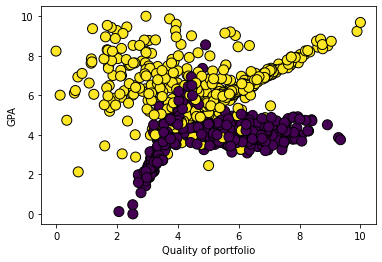

In [2]:
# generate syntatic data with two features (GPA and QP) and two class labels (sucsesful or not) 
from sklearn.datasets import make_moons, make_circles, make_classification,make_gaussian_quantiles
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# The random-state in the data generator is set to fix for reproducibility. 
data,labels =  make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, class_sep=0.9, random_state=42)
# fit the features in the range [0 10]
scaler = MinMaxScaler(feature_range=(0, 10))
data_scaled = scaler.fit_transform(data)
# plot samples of data points with their labels 
plt.scatter(data_scaled [:, 0], data_scaled [:, 1], marker='o', c=labels, s=100, edgecolor='k')
plt.xlabel('Quality of portfolio')
plt.ylabel('GPA')
plt.show()

So you should see a figure with two classes "Purple" and "Yellow". Can you guess which class represents the "successful" students?
Next we train a simple ML model on these data to classify "Purple" from "Yellow". 

---
We need to split our data into the test and train sets. The test set is used for evaluation of the model and the training set is for the model to learn the best decision-making rule from.

In [12]:
from sklearn.model_selection import train_test_split
 # normalizing data to get best performance 
X = StandardScaler().fit_transform(data)
 # splitting data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=.4, random_state=42)


In [13]:
from sklearn import metrics
# evalution function takes the test data and the clf and calculates the accuracy of the model
def evaluate(X_test,clf):
 y_pred = clf.predict(X_test)
 print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Our first model is a simple linear classifer to be trained and evaluted on the train and the test data respectively. 

In [14]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
evaluate(X_test,clf)

Accuracy: 0.8625


Our simple ML model performs with $86\%$ accuracy. Is that acceptable for our application? 

---

Let's look closer to the data again and the decision boundry of our trained classifier. 

In [15]:
# the function gets the training data, labels and the classifier and plots decision boundry 
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
def plot_decision_boundary(X_train,y_train,clf):
 gs = gridspec.GridSpec(2, 2)
 fig = plot_decision_regions(X_train, y_train.astype(np.integer),clf=clf, legend=2)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


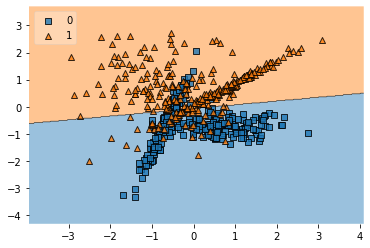

In [16]:
plot_decision_boundary(X_train,y_train,clf)

As you can see the linear classifier called support vector machine (SVM) may not be flexible enough to separate our (normalized) data. 

## Neural Network
The next classifier that we try is a very simple Neural Network that is a very basic nonlinear model that is called a multi-layer perceptron (MLP). 
MLP is more flexible than our simple SVM. 

In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(5, 2), learning_rate_init=0.005, max_iter=1000, random_state=1)
clf.fit(X_train,y_train)
evaluate(X_test,clf)

Accuracy: 0.9


Our accuracy improved to $90\%$ using the MLP. Let's look at the decision plot to get a glance at our neural network classifier.

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


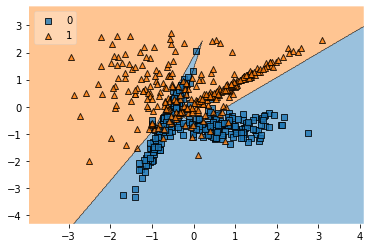

In [18]:
plot_decision_boundary(X_train,y_train,clf)